In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


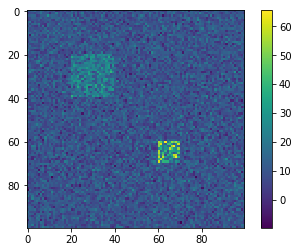

In [5]:
np.random.seed(42)
im = np.random.randn(100, 100) * 5 + 10
im[20:40,20:40] += np.random.rand(20, 20) * 20
im[60:70,60:70] += np.random.rand(10, 10) * 50
plt.imshow(im, cmap='viridis')
plt.colorbar()

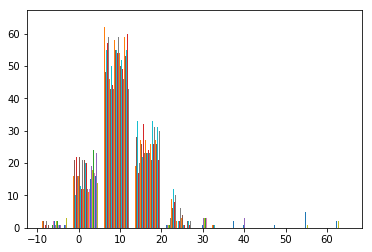

In [6]:
_ = plt.hist(im)

In [8]:
ZScaleInterval().get_limits(im)

(-9.6120012580917127, 41.277692678221449)

In [9]:
data = np.sort(im.flatten())
x = np.arange(len(data))
i_midpoint = int(len(data)/2)
fit = np.polyfit(x, data, deg=1)
fitted = np.poly1d(fit)(x)
fit

array([ 0.00194338,  0.89834023])

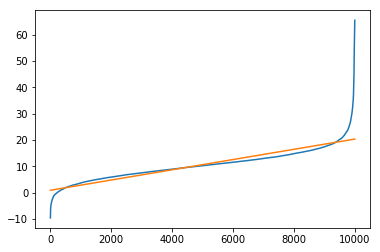

In [10]:
plt.plot(x, data)
plt.plot(x, fitted)

2.6385695266000386

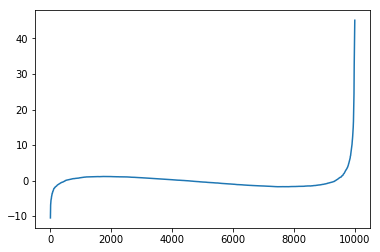

In [11]:
flat = data - fitted
plt.plot(x, flat)
flat.std()

In [12]:
npix = len(flat)
badpix = np.zeros(npix, dtype=bool)
threshold = 2.5 * flat.std()
badpix[(flat < - threshold) | (flat > threshold)] = True
badpix

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [13]:
fit = np.polyfit(x, data, deg=1, w=(~badpix).astype(int))
fitted = np.poly1d(fit)(x)
fit

array([ 0.0017874 ,  1.43262768])

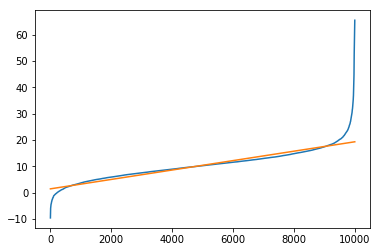

In [14]:
plt.plot(x, data)
plt.plot(x, fitted)

(2.6385695266000386, 2.676711685663355)

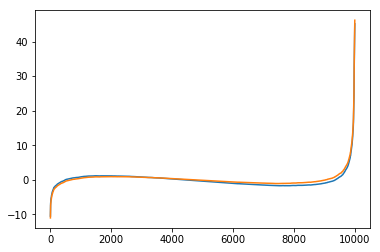

In [15]:
flat2 = data - fitted
plt.plot(x, flat)
plt.plot(x, flat2)
flat.std(), flat2.std()